In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [5]:
df=pd.read_csv("yrd.csv")

In [6]:
df.head()

,DATE,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),PC_YRD,Height (Re14-cb) (m)
0,2013/6/1,525.800000,62.083333,0.480000,88.600000,1,1538.400000
1,2013/6/6,993.000000,23.887500,0.186250,14.500000,3,2489.250000
2,2013/6/12,158.375000,85.555556,0.946250,3.750000,2,1307.625000
3,2013/6/17,1680.944444,80.904762,0.136667,4.166667,3,2428.666667
4,2013/6/18,1911.000000,65.300000,0.105000,57.000000,3,3192.500000


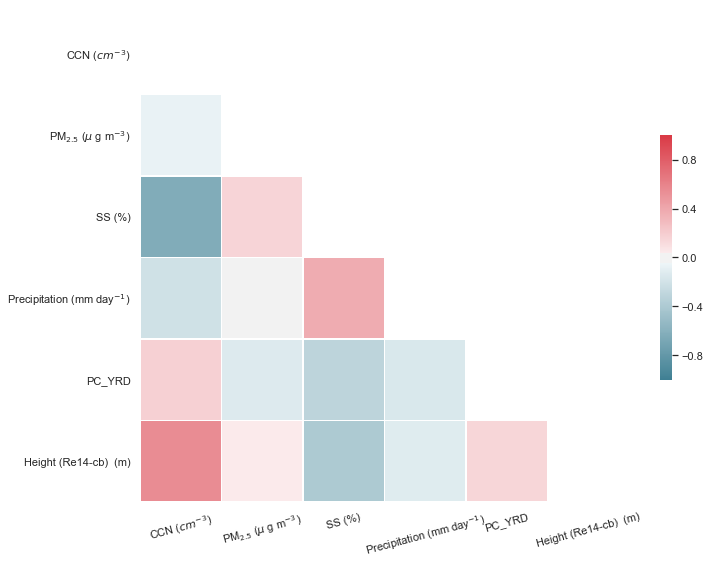

In [9]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=15)
plt.savefig("YRD_corr.png",dpi=600)

In [10]:
df=df[df["Precipitation (mm day$^{-1}$)"]>0]

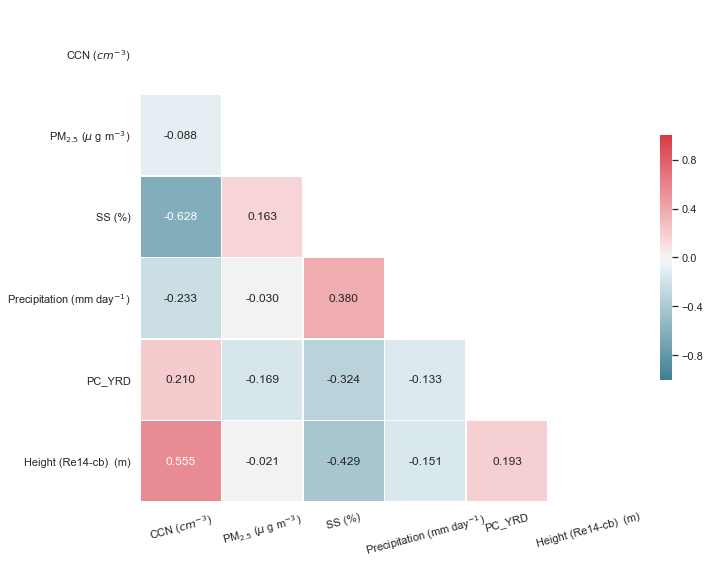

In [11]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("YRD_corr_num.png",dpi=600)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.set_index('DATE', inplace=True)

In [14]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "jjj_profilerain.html")

In [15]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,26.814,290,two-sided,1.690167e-80,"[884.47, 1024.6]",3.138,3.925e+76,1.0


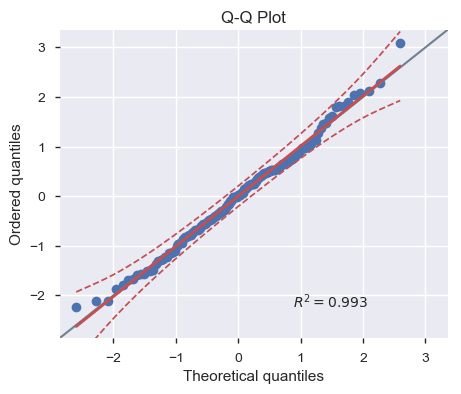

In [16]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [17]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,-0.233,"[-0.38, -0.07]",0.054,0.041,0.004739,5.368,0.811


In [18]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,-0.233,"[-0.38, -0.07]",0.054,0.041,0.004739,5.368,0.811


In [19]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,-0.628,"[-0.72, -0.52]",0.395,0.386,2.064738e-17,3.212e+14,1.0


In [20]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,146,0.555,"[0.43, 0.66]",0.308,0.299,3.532471e-13,2.411e+10,1.0


In [21]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,146,-0.165,"[-0.32, -0.0]",0.027,0.014,0.046856,0.514


In [23]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Precipitation (mm day$^{-1}$)', subject='PC_YRD')

AssertionError: 

In [24]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='PM$_{2.5}$ ($\mu$ g m$^{-3}$)', subject='PC_YRD')

AssertionError: 

In [ ]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='SS (%)', subject='PC_YRD')

In [ ]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Height (Re14-cb)  (m)', subject='PC_YRD')